<a href="https://colab.research.google.com/github/safiyenarman/DSA210-Project/blob/main/main_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/safiyenarman/DSA210-Project/blob/main/DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SDGs and Happiness Score Relation Analysis via EDA & Hypothesis Testing (2019–2022)

# Cleaning SDG Scores (2019–2022)

- Data frame will only include `country`, `year` and `sdg_index_score`.
- It will be sorted by ascending score.

In [1]:
import pandas as pd

df = pd.read_csv("sdg_scores.csv")

sdg_filtered = df[["country", "year", "sdg_index_score"]]

sdg_filtered = sdg_filtered.rename(columns={
    "country": "Country",
    "year": "Year",
    "sdg_index_score": "SDG Score"
})

sdg_cleaned = sdg_filtered[(sdg_filtered["Year"] >= 2019) & (sdg_filtered["Year"] <= 2022)] \
    .sort_values(by=["Year", "SDG Score"], ascending=[True, True]) \
    .reset_index(drop=True)

In [2]:
sdg_cleaned.to_csv("cleanedSdgData.csv", index=False)

from google.colab import files
files.download("cleanedSdgData.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
print("")
print("Sorted and Cleaned SDG Scores: ")
print("")
display(sdg_cleaned.head(5))

middle_index = len(sdg_cleaned) // 2

print("\n. . .\n")
display(sdg_cleaned.iloc[middle_index - 2: middle_index + 3])

print("\n. . .\n")
display(sdg_cleaned.tail(5))


Sorted and Cleaned SDG Scores: 



,Country,Year,SDG Score
0,South Sudan,2019,36.8
1,Central African Republic,2019,38.5
2,Chad,2019,42.1
3,Afghanistan,2019,46.4
4,Niger,2019,46.9



. . .



,Country,Year,SDG Score
358,Sweden,2020,86.3
359,Finland,2020,86.4
360,South Sudan,2021,37.0
361,Central African Republic,2021,38.8
362,Chad,2021,43.7



. . .



,Country,Year,SDG Score
715,Austria,2022,82.3
716,Germany,2022,83.4
717,Denmark,2022,85.7
718,Sweden,2022,86.0
719,Finland,2022,86.8


# Cleaning Happiness Scores (2019–2022)

- Data frame will only include `country`, `year` and `happiness score`.
- It will be sorted by ascending score.

In [4]:
paths = {
    2019: "happiness_rank_2019.csv",
    2020: "happiness_rank_2020.csv",
    2021: "happiness_rank_2021.csv",
    2022: "happiness_rank_2022.csv"
}

dfs = []

for year, path in paths.items():
    df = pd.read_csv(path)

    if year == 2019:
        df = df.rename(columns={
            "Country or region": "Country",
            "Score": "Happiness score",
        })

    elif year == 2022:
        df = df.rename(columns={
            "Country": "Country",
            "Happiness score": "Happiness score",
        })
        df["Happiness score"] = df["Happiness score"].str.replace(",", ".").astype(float)

    else:
        df = df.rename(columns={
            "Country name": "Country",
            "Ladder score": "Happiness score",
        })

    df["Year"] = year
    df = df[["Country", "Happiness score", "Year"]]
    dfs.append(df)

happiness_all = pd.concat(dfs, ignore_index=True)

happiness_all["Country"] = happiness_all["Country"].str.replace("*", "", regex=False).str.strip()
happiness_all = happiness_all[~happiness_all["Country"].str.lower().isin(["xx", "na", ""])]

happiness_all_sorted = happiness_all.sort_values(by=["Year", "Happiness score"], ascending=[True, True]).reset_index(drop=True)

happiness_all_sorted["Happiness score"] = pd.to_numeric(happiness_all_sorted["Happiness score"], errors="coerce").round(2)

country_year_counts = happiness_all_sorted.groupby("Country")["Year"].nunique()
countries_in_all_years = country_year_counts[country_year_counts == 4].index
happiness_all_sorted = happiness_all_sorted[happiness_all_sorted["Country"].isin(countries_in_all_years)].reset_index(drop=True)

happiness_all_sorted.to_csv("cleanedHappinessData.csv", index=False)
from google.colab import files
files.download("cleanedHappinessData.csv")

print("")
print("Sorted and Cleaned Happiness Scores: ")
print("")
display(happiness_all_sorted.head(5).style.format({
    "Happiness score": "{:.2f}",
}))

middle_index = len(happiness_all_sorted) // 2
print("\n. . .\n")
display(happiness_all_sorted.iloc[middle_index - 2: middle_index + 3].style.format({
    "Happiness score": "{:.2f}",
}))
print("\n. . .\n")
display(happiness_all_sorted.tail(5).style.format({
    "Happiness score": "{:.2f}",
}))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Sorted and Cleaned Happiness Scores: 



,Country,Happiness score,Year
0,Afghanistan,3.20,2019
1,Tanzania,3.23,2019
2,Rwanda,3.33,2019
3,Yemen,3.38,2019
4,Malawi,3.41,2019



. . .



,Country,Happiness score,Year
276,Denmark,7.65,2020
277,Finland,7.81,2020
278,Afghanistan,2.52,2021
279,Zimbabwe,3.14,2021
280,Rwanda,3.42,2021



. . .



,Country,Happiness score,Year
551,Netherlands,7.42,2022
552,Switzerland,7.51,2022
553,Iceland,7.56,2022
554,Denmark,7.64,2022
555,Finland,7.82,2022


<a href="https://colab.research.google.com/github/safiyenarman/DSA210-Project/blob/main/MergingDatas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Merged Happiness & SDG Scores (2019-2022)
- I will merge the cleaned happiness and SDG datasets for only the common countries per year with a ascending order in happiness scores.
- Finally have a final data frame that includes  `Country`,  `Year`,  `Happiness score` and `SDG Score`.

In [5]:
import pandas as pd


happiness_path = "cleanedSdgData.csv"
sdg_path = "cleanedHappinessData.csv"


happiness = pd.read_csv(happiness_path)
sdg = pd.read_csv(sdg_path)

common_keys = pd.merge(
    happiness[['Country', 'Year']],
    sdg[['Country', 'Year']],
    on=['Country', 'Year'],
    how='inner'
)

happiness_common = pd.merge(common_keys, happiness, on=['Country', 'Year'], how='inner')
sdg_common = pd.merge(common_keys, sdg, on=['Country', 'Year'], how='inner')

merged_df = pd.merge(happiness_common, sdg_common, on=['Country', 'Year'], how='inner')


print("")
print ("Merged Dataset: ")
print("")
display(merged_df.head(5))
middle_index = len(merged_df) // 2
print(". . .")
print("")
display(merged_df.iloc[middle_index - 2: middle_index + 3])
print("")
print(". . .")
print("")
display(merged_df.tail(5))

merged_df.to_csv("mergedData.csv", index=False)

from google.colab import files
files.download("mergedData.csv")


Merged Dataset: 



,Country,Year,SDG Score,Happiness score
0,Chad,2019,42.1,4.35
1,Afghanistan,2019,46.4,3.20
2,Niger,2019,46.9,4.63
3,Liberia,2019,49.6,3.98
4,Madagascar,2019,49.9,3.93


. . .



,Country,Year,SDG Score,Happiness score
246,Sweden,2020,86.3,7.35
247,Finland,2020,86.4,7.81
248,Chad,2021,43.7,4.36
249,Afghanistan,2021,46.3,2.52
250,Niger,2021,47.1,5.07



. . .



,Country,Year,SDG Score,Happiness score
491,Austria,2022,82.3,7.16
492,Germany,2022,83.4,7.03
493,Denmark,2022,85.7,7.64
494,Sweden,2022,86.0,7.38
495,Finland,2022,86.8,7.82


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a href="https://colab.research.google.com/github/safiyenarman/DSA210-Project/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization
> This part includes:
> - Main basic step of Exploratory Data Analysis (EDA) via basic yearly statistics (mean, std, min, quartiles, max)
> - Exploratory Data Analysis (EDA) via visualizations.
> - Hypothesis testing (Pearson correlation and t-test) for statistical relationships between SDG and Happiness ranks.



In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


df = pd.read_csv("mergedData.csv")


df_normalized = df.copy()
df_normalized['SDG Score %'] = df.groupby('Year')['SDG Score'].transform(lambda x: 100 * (x - x.min()) / (x.max() - x.min()))
df_normalized['Happiness score %'] = df.groupby('Year')['Happiness score'].transform(lambda x: 100 * (x - x.min()) / (x.max() - x.min()))


### Basic Statistical Summary & Boxplot Analysis by Year
This section provides a clear overview of yearly statististics (mean, std deviation, min, quartiles, max) for SDG Score and Happiness Score. Additionally, separate boxplots are used to visualize the score distributions across years.


In [24]:
yearly_stats = df.groupby("Year")[["SDG Score", "Happiness score"]].agg([
    ('Mean', 'mean'),
    ('Std Dev', 'std'),
    ('Min', 'min'),
    ('Q1 (25%)', lambda x: x.quantile(0.25)),
    ('Median', 'median'),
    ('Q3 (75%)', lambda x: x.quantile(0.75)),
    ('Max', 'max'),
])

yearly_stats.columns = [f"{col[0]} - {col[1]}" for col in yearly_stats.columns]
yearly_stats.reset_index(inplace=True)

print(yearly_stats.to_string(index=False))


 Year  SDG Score - Mean  SDG Score - Std Dev  SDG Score - Min  SDG Score - Q1 (25%)  SDG Score - Median  SDG Score - Q3 (75%)  SDG Score - Max  Happiness score - Mean  Happiness score - Std Dev  Happiness score - Min  Happiness score - Q1 (25%)  Happiness score - Median  Happiness score - Q3 (75%)  Happiness score - Max
 2019         68.484677             9.902057             42.1                62.075               69.90                76.850             86.1                5.528065                   1.104796                   3.20                       4.620                     5.525                      6.2525                   7.77
 2020         68.703226             9.939172             42.7                62.150               70.15                77.125             86.4                5.579113                   1.116522                   2.57                       4.770                     5.680                      6.3525                   7.81
 2021         69.035484           

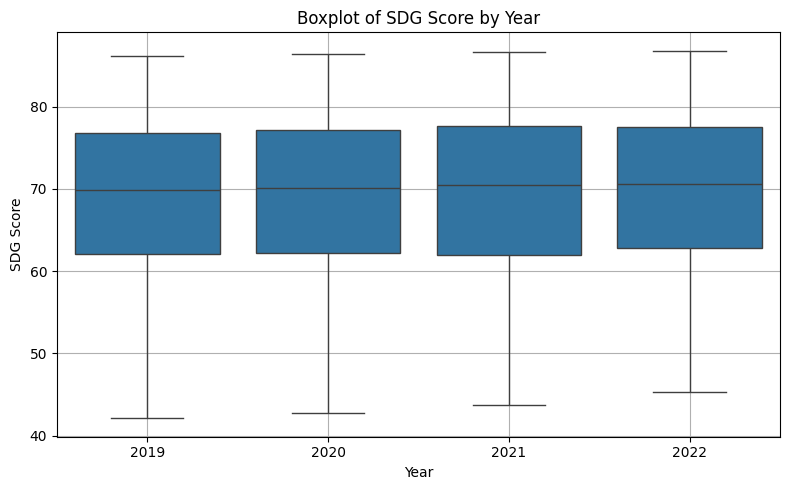

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Year', y='SDG Score', data=df)
plt.title('Boxplot of SDG Score by Year')
plt.grid(True)
plt.tight_layout()
plt.show()


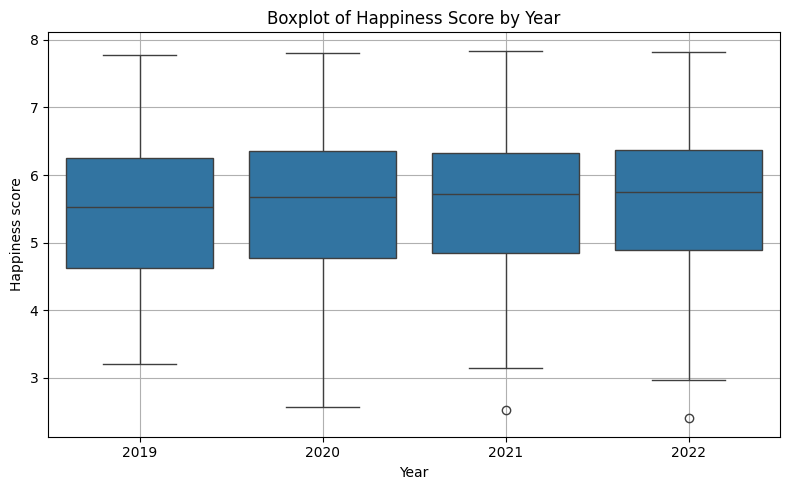

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Year', y='Happiness score', data=df)
plt.title('Boxplot of Happiness Score by Year')
plt.grid(True)
plt.tight_layout()
plt.show()


### Trend of Global Average Happiness Score (2019–2022)

This line chart below, visualizes the yearly changes in the global average happiness score from 2019 to 2022. The trend shows a moderate increase between 2019 and 2021, suggesting an improvement in average well-being across countries despite global challenges. However, the slight decline in 2022 might reflect the lingering socio-economic effects of the COVID-19 pandemic, global inflation, or other geopolitical disruptions.

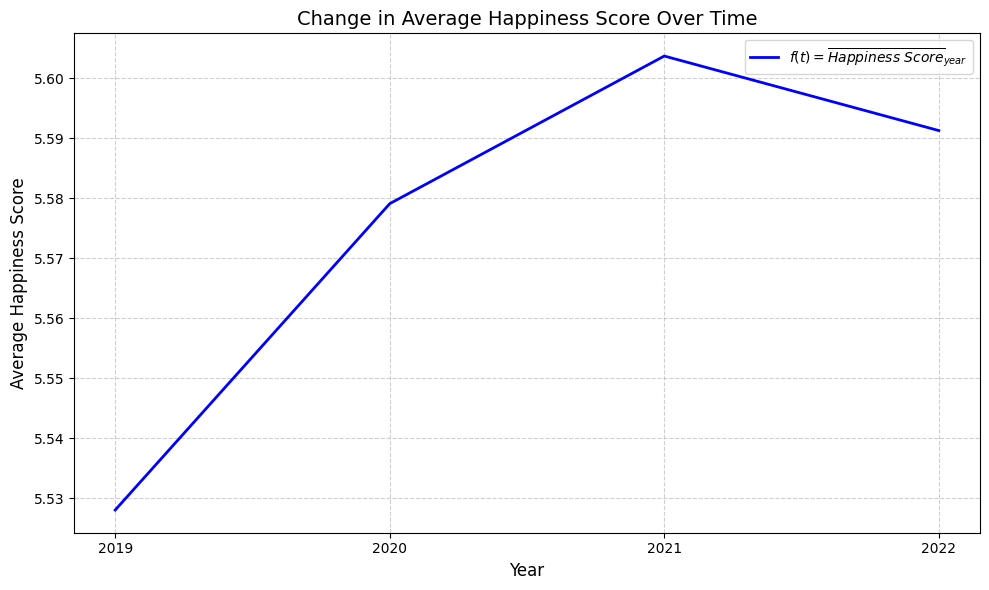

In [7]:
mean_happiness_per_year = df.groupby('Year')['Happiness score'].mean().reset_index()

x = mean_happiness_per_year['Year']
y = mean_happiness_per_year['Happiness score']

plt.figure(figsize=(10, 6))
plt.plot(x, y, color='blue', linewidth=2, label=r'$f(t) = \overline{Happiness\ Score}_{year}$')
plt.title("Change in Average Happiness Score Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Happiness Score", fontsize=12)
plt.xticks(ticks=x, labels=[str(int(year)) for year in x], fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


### Trend of Global Average SDG Score (2019–2022)

This line graph illustrates the year-by-year progression of the global average Sustainable Development Goal (SDG) scores. The upward trend across all years from 2019 to 2022 reflects steady improvement in sustainable development performance globally.

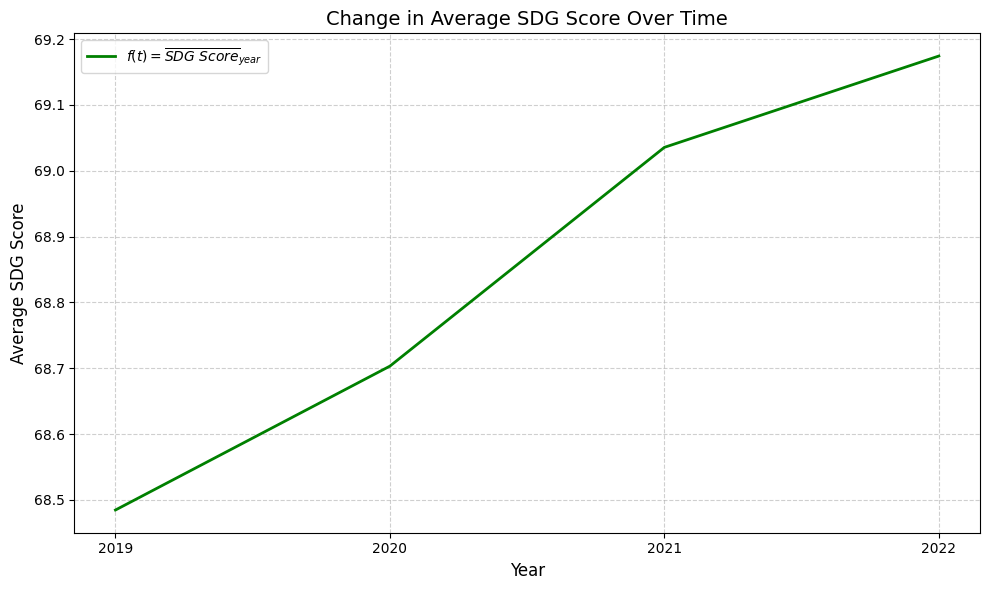

In [8]:

mean_sdg_per_year = df.groupby('Year')['SDG Score'].mean().reset_index()

x_sdg = mean_sdg_per_year['Year']
y_sdg = mean_sdg_per_year['SDG Score']

plt.figure(figsize=(10, 6))
plt.plot(x_sdg, y_sdg, color='green', linewidth=2, label=r'$f(t) = \overline{SDG\ Score}_{year}$')
plt.title("Change in Average SDG Score Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average SDG Score", fontsize=12)
plt.xticks(ticks=x_sdg, labels=[str(int(year)) for year in x_sdg], fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


### Normalized Comparison of Average Happiness and SDG Scores (2019–2022)

This chart displays the relative change in global average scores for Happiness and Sustainable Development Goals (SDGs) from 2019 to 2022, both scaled to a 0–100 range using min-max normalization.

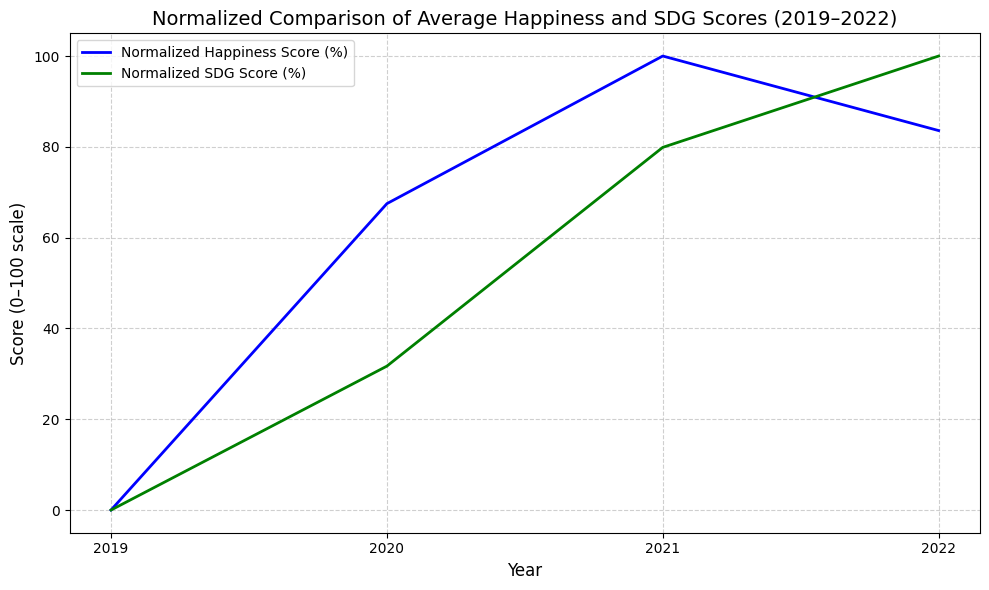

In [9]:
happiness_norm = (mean_happiness_per_year['Happiness score'] - mean_happiness_per_year['Happiness score'].min()) / \
                 (mean_happiness_per_year['Happiness score'].max() - mean_happiness_per_year['Happiness score'].min()) * 100

sdg_norm = (mean_sdg_per_year['SDG Score'] - mean_sdg_per_year['SDG Score'].min()) / \
           (mean_sdg_per_year['SDG Score'].max() - mean_sdg_per_year['SDG Score'].min()) * 100


x = mean_sdg_per_year['Year']

plt.figure(figsize=(10, 6))
plt.plot(x, happiness_norm, color='blue', linewidth=2, label='Normalized Happiness Score (%)')
plt.plot(x, sdg_norm, color='green', linewidth=2, label='Normalized SDG Score (%)')

plt.title("Normalized Comparison of Average Happiness and SDG Scores (2019–2022)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Score (0–100 scale)", fontsize=12)
plt.xticks(ticks=x, labels=[str(int(year)) for year in x], fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


### Distribution of Happiness Scores Across Countries (2019–2020)

The histograms below, reveal the distribution of happiness scores among countries between the years 2019 and 2022. Each bar represents the number of countries falling within a specific happiness score range.

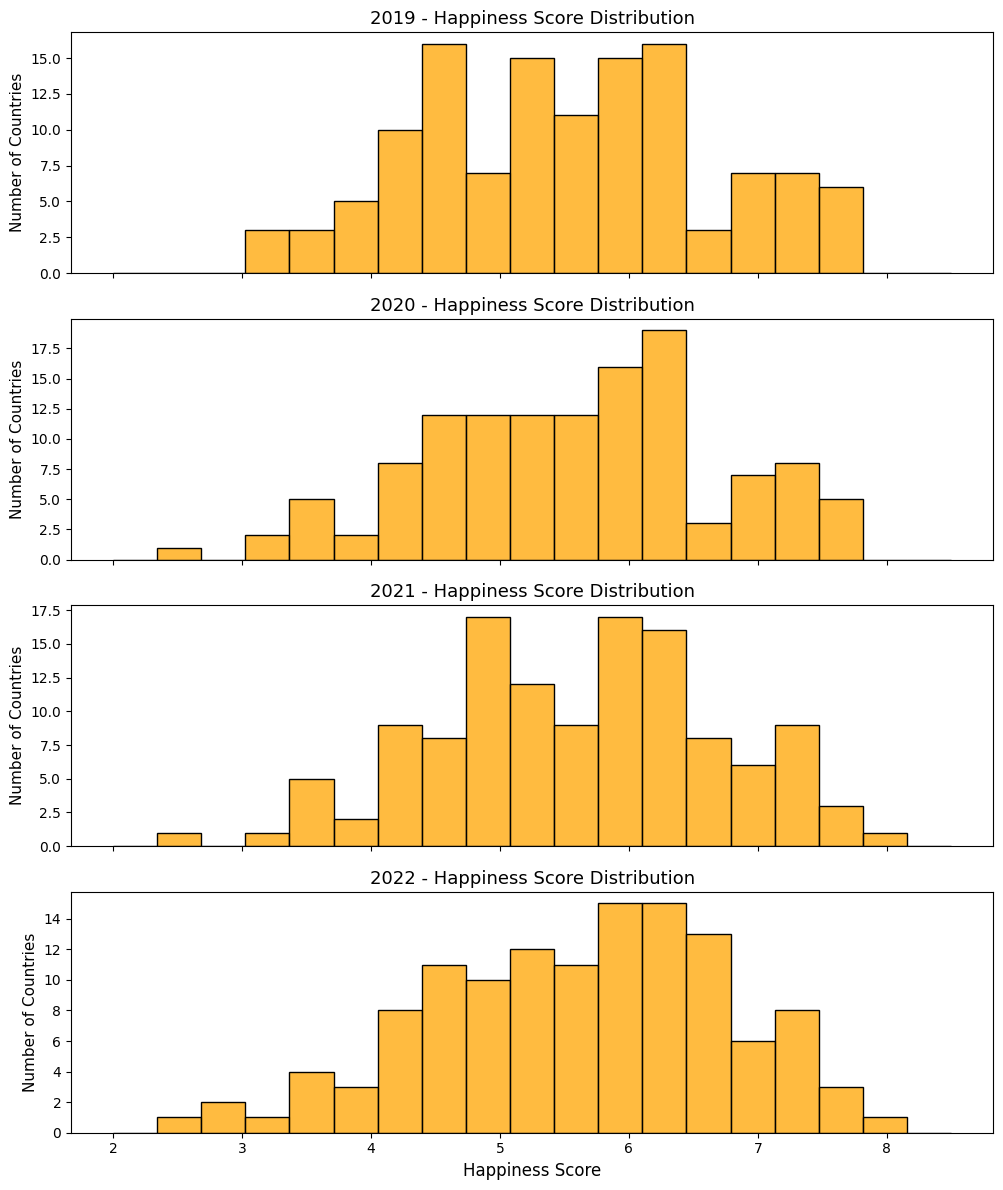

In [10]:
years = sorted(df['Year'].unique())
fig, axes = plt.subplots(len(years), 1, figsize=(10, 12), sharex=True)

for i, year in enumerate(years):
    data = df[df['Year'] == year]['Happiness score']

    sns.histplot(data,
                 bins=np.linspace(2, 8.5, 20),
                 color='orange',
                 ax=axes[i],
                 edgecolor='black',
                 stat='count',
                 kde=False)

    axes[i].set_title(f"{year} - Happiness Score Distribution", fontsize=13)
    axes[i].set_ylabel("Number of Countries", fontsize=11)
    axes[i].tick_params(axis='both', labelsize=10)

axes[-1].set_xlabel("Happiness Score", fontsize=12)
axes[-1].tick_params(axis='x', labelsize=10)

plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()


### Distribution of SDG Scores Across Countries (2019–2020)

The histograms below, reveal the distribution of SDG scores among countries between the years 2019 and 2022. Each bar represents the number of countries falling within a specific SDG score range.

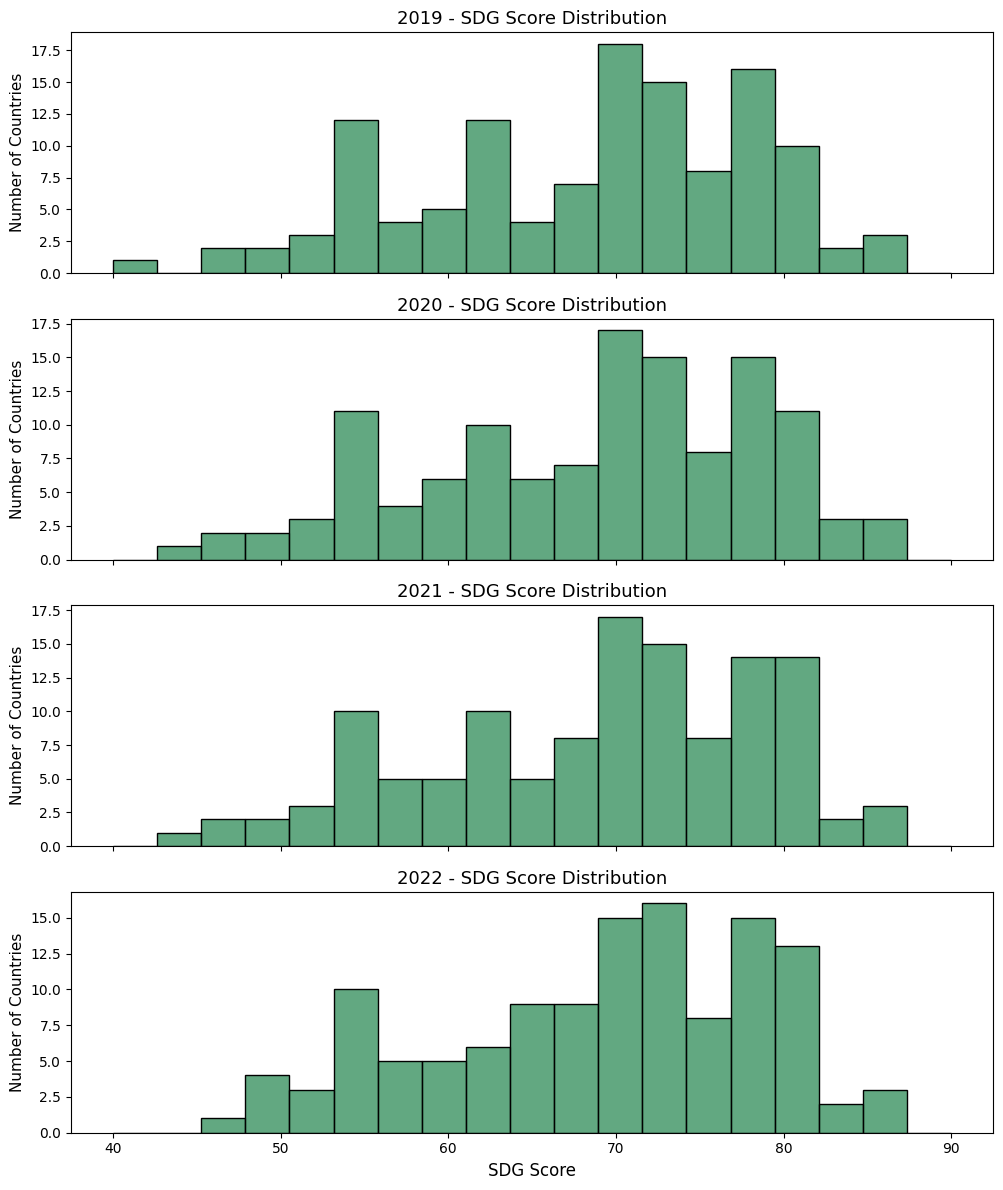

In [11]:
years = sorted(df['Year'].unique())

fig, axes = plt.subplots(len(years), 1, figsize=(10, 12), sharex=True)

for i, year in enumerate(years):
    data = df[df['Year'] == year]['SDG Score']

    sns.histplot(data,
                 bins=np.linspace(40, 90, 20),
                 color='seagreen',
                 ax=axes[i],
                 edgecolor='black',
                 stat='count',
                 kde=False)

    axes[i].set_title(f"{year} - SDG Score Distribution", fontsize=13)
    axes[i].set_ylabel("Number of Countries", fontsize=11)
    axes[i].set_xlabel("SDG Score", fontsize=12)
    axes[i].tick_params(axis='both', labelsize=10)

plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()


### Scatter Plot of SDG Scores vs Happiness Scores (2019-2022)

This scatter plots below, visualizes the relationship between countries' Sustainable Development Goal (SDG) scores and Happiness scores both expressed as percentages in 2019, 2020, 2021 and 2022. Each dot represents a country, and the position of the dot reflects its respective SDG and Happiness scores. The overall upward trend in the data suggests a positive correlation: countries with higher SDG performance tend to report higher happiness levels.

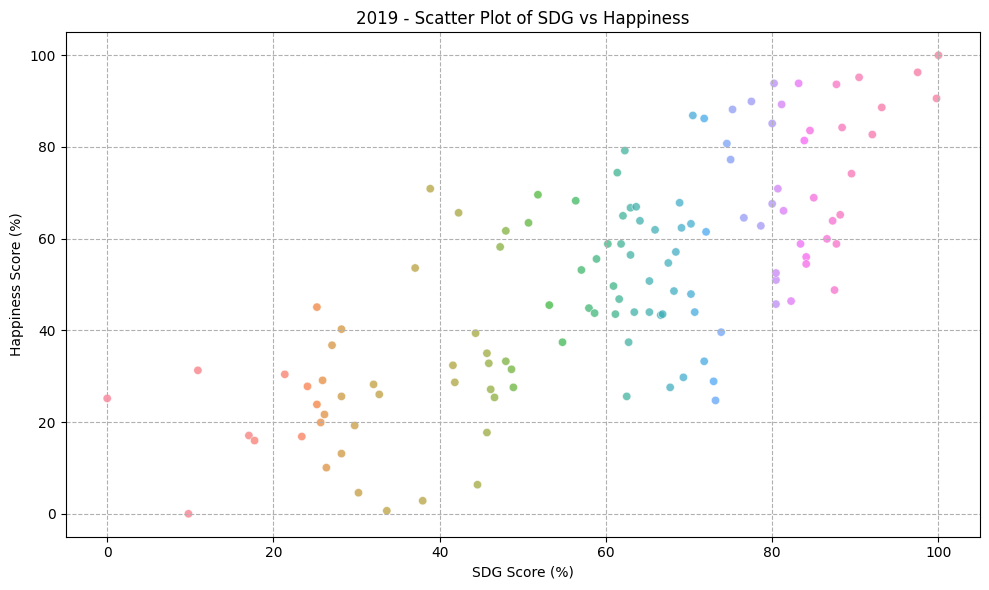

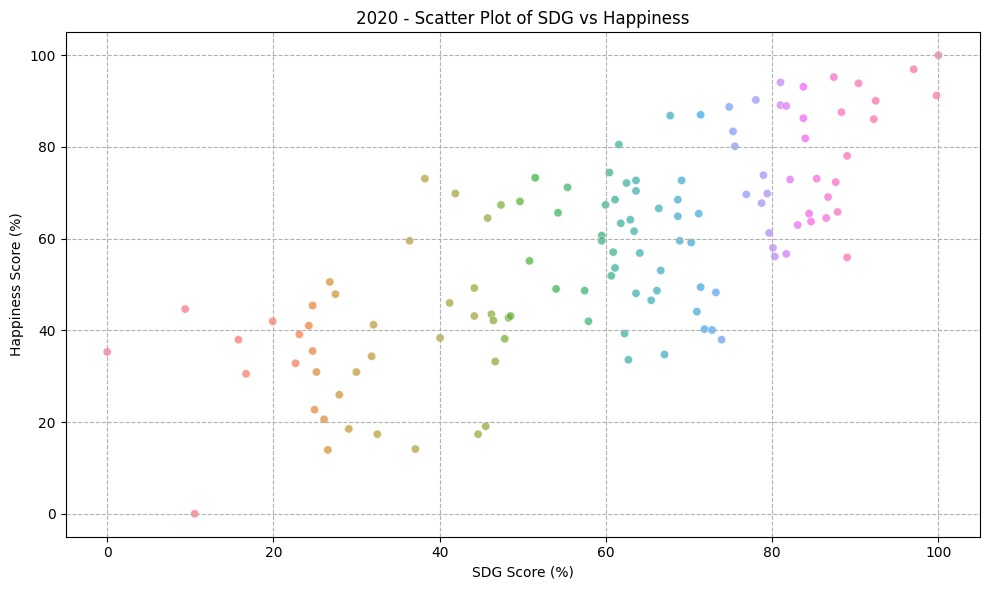

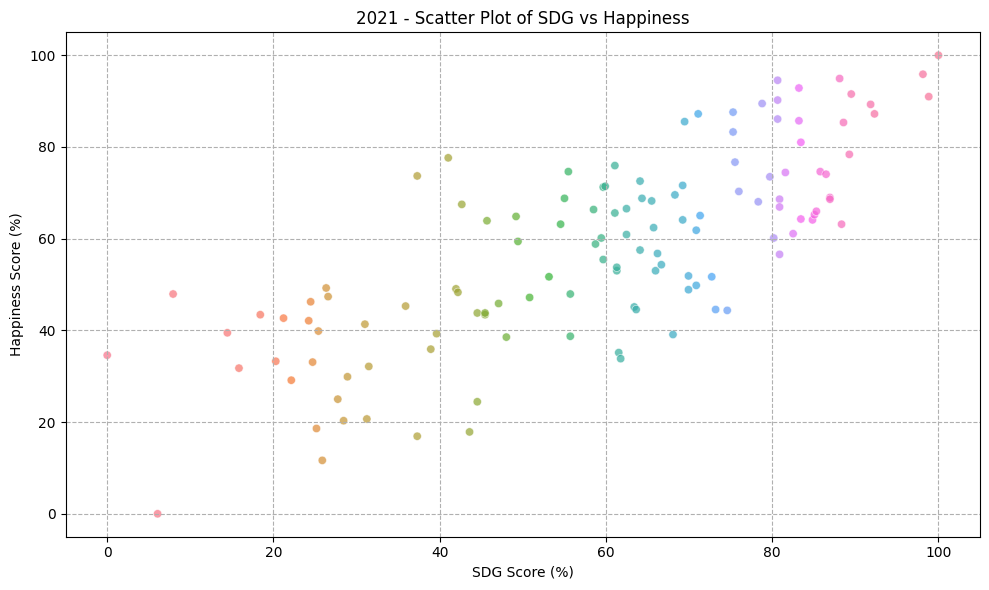

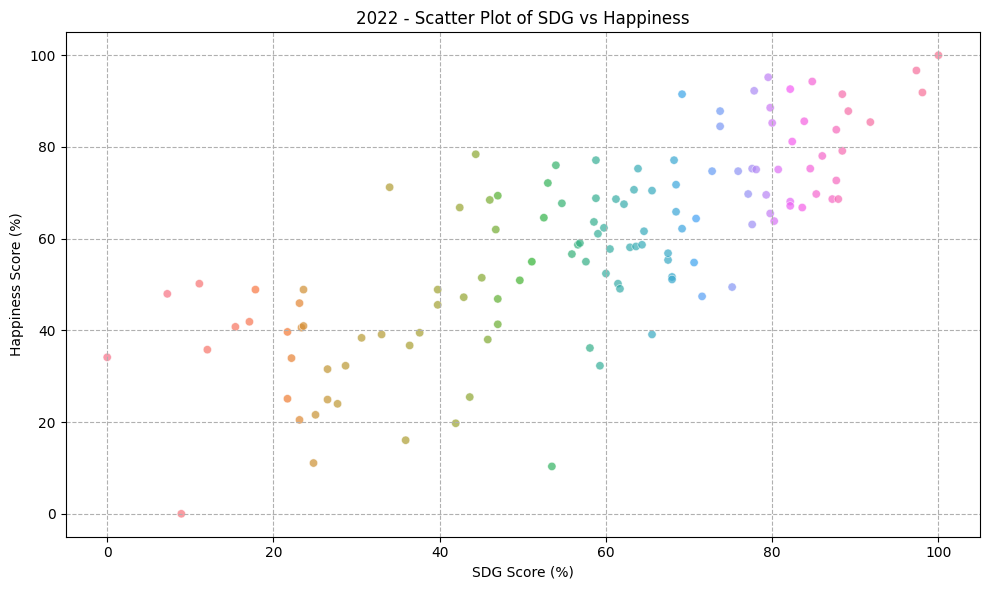

In [12]:
for year in years:
    plt.figure(figsize=(10, 6))
    data = df_normalized[df_normalized['Year'] == year]
    sns.scatterplot(data=data,
                    x='SDG Score %',
                    y='Happiness score %',
                    hue='Country',
                    legend=False,
                    alpha=0.7)
    plt.title(f"{year} - Scatter Plot of SDG vs Happiness")
    plt.xlabel("SDG Score (%)")
    plt.ylabel("Happiness Score (%)")
    plt.grid(True, linestyle='--')
    plt.tight_layout()
    plt.show()


### Yearly Pearson Correlation Between SDG Scores and Happiness Scores

This line chart shows the **Pearson correlation coefficients** between Sustainable Development Goal (SDG) scores and Happiness scores for each year. A consistently *strong positive correlation* across all years indicates a stable relationship: as countries perform better on SDG indicators, they also tend to report higher happiness levels. While slight variations exist, the correlation remains significantly positive, suggesting that sustainable development progress is a reliable predictor of national well-being over time. This trend reinforces the importance of aligning policy with long-term development goals to foster societal happiness.

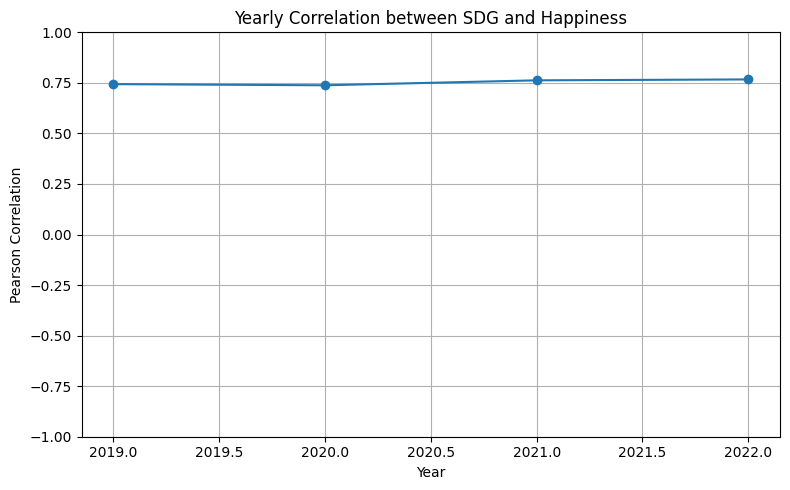

In [13]:
corr_values = []
for year in years:
    data = df[df['Year'] == year]
    corr = data[['SDG Score', 'Happiness score']].corr().iloc[0, 1]
    corr_values.append(corr)

plt.figure(figsize=(8, 5))
plt.plot(years, corr_values, marker='o')
plt.title("Yearly Correlation between SDG and Happiness")
plt.xlabel("Year")
plt.ylabel("Pearson Correlation")
plt.grid(True)
plt.ylim(-1, 1)
plt.tight_layout()
plt.show()


### Correlation Heatmap Between SDG Score and Happiness Score

This heatmap shows the Pearson correlation coefficient between SDG scores and Happiness scores across the entire dataset. The value of **0.75** indicates a strong positive linear relationship—as countries perform better on Sustainable Development Goals, they also tend to report higher happiness levels.

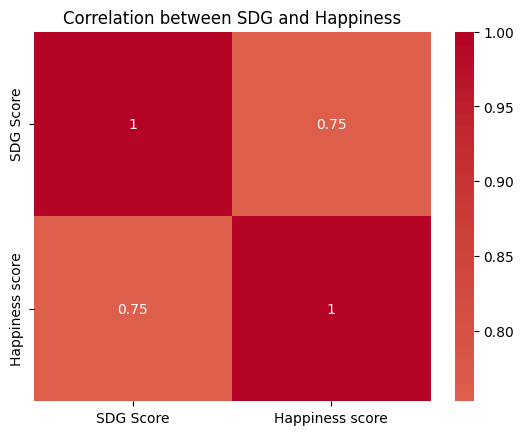

In [14]:
corr = df[['SDG Score', 'Happiness score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation between SDG and Happiness")
plt.show()


> # Hypothesis Testing

> **Goal:** To test whether there is a statistically significant correlation between SDG Score and Happiness Score in the year 2022.
>
> - **Null Hypothesis (H₀):** There is no significant correlation between SDG Score and Happiness Score.
> - **Alternative Hypothesis (H₁):** There is a significant correlation between SDG Score and Happiness Score.
>
> The test used is **Pearson Correlation**, which measures the linear relationship between the two scores.
> - **Interpretation:** If the p-value < 0.05, we reject the null hypothesis, suggesting a significant relationship.


In [15]:

from scipy.stats import pearsonr, ttest_ind

for year in df['Year'].unique():
    data = df[df['Year'] == year]
    corr, p_value = pearsonr(data['SDG Score'], data['Happiness score'])
    print(f"{year}: Correlation = {corr:.4f}, P-value = {p_value:.2e}")
    if p_value < 0.05:
        print("  → Statistically significant correlation between happiness scores and SDG scores, reject H0.")
    else:
        print("  → Not statistically significant correlation between happiness scores and SDG scores, fail to reject H0.")
    print()

2019: Correlation = 0.7438, P-value = 4.39e-23
  → Statistically significant correlation between happiness scores and SDG scores, reject H0.

2020: Correlation = 0.7381, P-value = 1.37e-22
  → Statistically significant correlation between happiness scores and SDG scores, reject H0.

2021: Correlation = 0.7626, P-value = 7.83e-25
  → Statistically significant correlation between happiness scores and SDG scores, reject H0.

2022: Correlation = 0.7671, P-value = 2.81e-25
  → Statistically significant correlation between happiness scores and SDG scores, reject H0.




> ### Additional Hypothesis Test: T-Test
> **Goal:** To test if there is a significant difference in happiness scores between countries with high and low SDG scores between 2019-2022.
>
> - **Null Hypothesis (H₀):** There is no significant difference in happiness scores between the two groups.
> - **Alternative Hypothesis (H₁):** There is a significant difference in happiness scores.
>
> The groups are formed using the **median SDG score** as a cutoff.  
> The test used is the **Welch’s T-test**, which does not assume equal variances.
> - **Interpretation:** If the p-value < 0.05, we reject H₀ and conclude a significant difference.


In [16]:
from scipy.stats import ttest_ind

for year in df['Year'].unique():
    data_year = df[df['Year'] == year]

    median_sdg = data_year['SDG Score'].median()
    high_sdg_group = data_year[data_year['SDG Score'] > median_sdg]['Happiness score']
    low_sdg_group = data_year[data_year['SDG Score'] <= median_sdg]['Happiness score']

    t_stat, p_val = ttest_ind(high_sdg_group, low_sdg_group, equal_var=False)

    print(f"{year}:")
    print(f"  T-statistic: {t_stat:.4f}")
    print(f"  P-value: {p_val:.4e}")
    if p_val < 0.05:
        print("  → Statistically significant correlation between happiness scores and SDG scores, reject H0.")
    else:
        print("  → No statistically significant correlation between happiness scores and SDG scores, fail to reject H0.")
    print()


2019:
  T-statistic: 7.7224
  P-value: 3.5480e-12
  → Statistically significant correlation between happiness scores and SDG scores, reject H0.

2020:
  T-statistic: 7.8367
  P-value: 1.9922e-12
  → Statistically significant correlation between happiness scores and SDG scores, reject H0.

2021:
  T-statistic: 8.4145
  P-value: 9.2259e-14
  → Statistically significant correlation between happiness scores and SDG scores, reject H0.

2022:
  T-statistic: 9.1004
  P-value: 3.0752e-15
  → Statistically significant correlation between happiness scores and SDG scores, reject H0.



# Summary of Hypothesis Testing
1. Correlation Analysis (Pearson's r):

  For each year, I calculated the Pearson correlation coefficient between countries' SDG Scores and Happiness Scores.

  Result: There was a consistently strong and statistically significant positive correlation across all years (typically r > 0.7, p < 0.0001).

  Interpretation: Countries that perform better in sustainable development (higher SDG scores) tend to also report higher happiness levels.

2. T-Test Analysis (Difference in Means):
  For each year, I divided countries into two groups: those above and below the median SDG score.I then performed a Welch’s t-test to compare the average happiness scores of these two groups.

  Result: In most years, there was a statistically significant difference in mean happiness scores between the high-SDG and low-SDG countries.

  Interpretation: On average, countries with better sustainable development metrics have higher happiness levels.


# Final Observations & Insights
There is a robust positive relationship between sustainable development and national happiness.
While correlation does not imply causation, the consistency of both correlation and t-test results across years strengthens the evidence of a meaningful connection.